<a href="https://colab.research.google.com/github/jctan05/biostats_HW/blob/master/STATS522_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set('notebook')

In [0]:
df = pd.read_csv('SENIC.txt', header= None, names=["id", "los", "age", "infect", "culture", "xray", "beds",  
                  "school", "region", "census", "nurses", "service"], delim_whitespace=True)

1. Refer to the SENIC data set in the previous assignments. A multiple regression model has been proposed for predicting the average length of stay in a hospital (Y: LOS), using the following five predictors: infection risk (X1), average daily census (X2), number of nurses (X3), number of beds (X4), and routine chest X-ray (X5).

    a. Fit the proposed multiple regression model using X1 to X5. Report the estimated regression equation. For each beta estimate, report a 95% confidence interval.

In [0]:

mod = smf.ols(formula='los ~ infect + census + nurses + beds + xray', data=df)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    los   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     22.07
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           3.85e-15
Time:                        11:48:02   Log-Likelihood:                -193.00
No. Observations:                 113   AIC:                             398.0
Df Residuals:                     107   BIC:                             414.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4237      0.609      8.912      0.0

In [0]:
print(res.ssr)
print(res.ess)
print(res.centered_tss)

201.43292280403205
207.77745772694135
409.2103805309734


The estimated regression equation is
$los = 5.4237 + 0.4527*infect + 0.212*census -0.0067*nurses -0.0094*beds + 0.0209 * xray$

$\beta_{1}$ : [0.216, 0.689]  
$\beta_{2}$ : [0.012, 0.030]  
$\beta_{3}$ : [-0.011, -0.002]  
$\beta_{4}$ : [-0.017, -0.002]  
$\beta_{5}$ : [0.006, 0.036]



---

b. Report the coefficient of determination and test whether there is a regression relation using the overall F-test. Make sure to state the null hypothesis being tested here. State your conclusion and interpret the result.

$R^2$ = 0.508

There is as regression relation using the overall F-test (F-statistic 22.07, p-value < 0.05). The null hypothesis is that $\beta_{1} = \beta_{2} = \beta{3} = \beta{4} = \beta{5} = 0$. 

According to the overall F-test, the means of one paramter is significantly different from the other parameters.



---

Construct the ANOVA table that decomposes the regression sum of squares (SSR) into extra sums of squares as shown below. Make sure to fill in all the degrees of freedom as well.










In [0]:
print(sm.stats.anova_lm(res, typ=1)) # Type 1 ANOVA dataframe

print('SSE: : {}'.format(sm.stats.anova_lm(res, typ=1)['sum_sq'].sum()-sm.stats.anova_lm(res, typ=1)['sum_sq']['Residual']))
print('Total SS : {}'.format(sm.stats.anova_lm(res, typ=1)['sum_sq'].sum()))

             df      sum_sq     mean_sq          F        PR(>F)
infect      1.0  116.445856  116.445856  61.855363  3.145187e-12
census      1.0   35.019697   35.019697  18.602260  3.598345e-05
nurses      1.0   28.382473   28.382473  15.076605  1.789914e-04
beds        1.0   13.611084   13.611084   7.230129  8.317098e-03
xray        1.0   14.318348   14.318348   7.605823  6.843435e-03
Residual  107.0  201.432923    1.882551        NaN           NaN
SSE: : 207.77745772694152
Total SS : 409.21038053097357


| Source  | df  |  SS |
|-------|---|---|
| Regression | | |
| $SSR(X_{1})$ | 1 | 116.445856 |
| $SSR(X_{2} | X_{1})$ | 1 | 35.019697 |
| $SSR(X_{3} | X_{1}, X_{2})$| 1 | 28.382473 |
| $SSR(X_{4} | X_{1}, X_{2}, X_{3})$| 1 | 13.611084 |
| $SSR(X_{5} | X_{1}, X_{2}, X_{3}, X_{4})$| 1 | 14.318348 | 
| Error | 107 | 207.77745 |
| Total| 112 | 409.2103805 | 



---

Based on the table you obtained in part c) above, test whether X3 can be dropped from the model having X1 and X2. Make sure to state the null hypothesis. Manually calculate the F- statistic. What are degrees of freedom associated with this F-test? Verify your calculation using SAS or R. According to the computer output, what is your conclusion?

- To test whether or not X3 can be dropped from the model having X1 and X2, we must compare the full model (X1, X2, and X3), and the reduced model (X1 and X2 only). 
- The null hypothesis is that with X1 in the model, $\beta_{2} = \beta_{3} = 0$. 
- The F-statistic is calculated manually by:
$$ F* = \frac{SSR(X3 | X1, X2 ) / 1}{SSE (X1, X2, X3) / 109} = \frac{28.38/1}{(179.848/109)} = 14.17$$
- The degrees of freedom that are associated with this F-test are degrees of freedom of the reduced model - the degrees of freedom of the full model (or, how many predictors are removed. 1 in this case), divided by the degrees of freedom in the error term of the full model (109).




In [0]:
mod_f = smf.ols(formula='los ~ infect + census + nurses', data=df).fit()
mod_r = smf.ols(formula='los ~ infect + census', data=df).fit()

print(mod_f.compare_f_test(restricted = mod_r))
print('F-value,', 'p-value,', 'Difference in df')

(13.488218766225195, 0.0003737485539846009, 1.0)
F-value, p-value, Difference in df


Based on this calculation (p < 0.05 with an F = 13.48), we fail to reject the null hypothesis and accept the alternative hypotehsis that either $\beta{2}$ or $\beta{3}$ is not zero with X1 in the model.


---
Run a regression model including X1, X2 and X3. Report the t-statistic associated with X3 and its p-value. Verify that this p-value is identical to the one you obtained in part d) above. Verify that the square of the t-statistic is equal to the F-statistic of the general linear F-test in part d).


In [0]:
mod_f.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    los   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     28.49
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           1.12e-13
Time:                        11:49:25   Log-Likelihood:                -200.34
No. Observations:                 113   AIC:                             408.7
Df Residuals:                     109   BIC:                             419.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2839      0.466     13.491      0.000       5.361       7.207
infect         0.6387      0.111      5.732      0.000       0.418       0.860
census         0.0109      0.002      5.121      0.000       0.007       0.015
nurses        -0.0087      0.002     -3.673      0.000      -0.013      -0.004
==============================================================================
Omnibus:                       44.918   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.863
Skew:                           1.289   Prob(JB):                     5.32e-40
Kurtosis:                       8.636   Cond. No.                     1.14e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [0]:
print(sm.stats.anova_lm(mod_f, typ=1)) # Type 1 ANOVA dataframe

print('SSE: : {}'.format(sm.stats.anova_lm(mod_f, typ=1)['sum_sq'].sum()-sm.stats.anova_lm(mod_f, typ=1)['sum_sq']['Residual']))
print('Total SS : {}'.format(sm.stats.anova_lm(mod_f, typ=1)['sum_sq'].sum()))


             df      sum_sq     mean_sq          F        PR(>F)
infect      1.0  116.445856  116.445856  55.338629  2.472418e-11
census      1.0   35.019697   35.019697  16.642430  8.616357e-05
nurses      1.0   28.382473   28.382473  13.488219  3.737486e-04
Residual  109.0  229.362354    2.104242        NaN           NaN
SSE: : 179.84802627544258
Total SS : 409.21038053097345


In [0]:
sm.stats.anova_lm(mod_f, typ=1)['sum_sq']['Residual']

229.36235425553087

In [0]:
mod_f.pvalues

Intercept    5.492920e-25
infect       8.937340e-08
census       1.318149e-06
nurses       3.737486e-04
dtype: float64

In [0]:
mod_f.tvalues[3]**2

13.488218766225806

The t-statistic for X3 is -3.673 and the p-value is 3.73e-04. This p-value is identical to part d above and the square of the t-statistic is 13.48, which is equal to the F-statistic of the general linear F-test as well.



---

f. Based on the table you obtained in part c) above, test whether X4 and X5 can be simultaneously dropped from the model having X1, X2 and X3. Make sure to state the null hypothesis. Manually calculate the F-statistic. What are degrees of freedom associated with this F-test? Verify your calculation using SAS or R. According to the computer output, what is your conclusion?

- The null hypothesis is that with X1, X2, and X3 in the model, $\beta_{4} = \beta_{5} = 0$. 
- The F-statistic is calculated manually by:
$$ F* = \frac{SSR(X4, X5 | X1, X2, X3 ) / 2}{SSE (X1, X2, X3, X4, X5) / 107} = \frac{(SSR(X1, X2, X3, X4, X5) - SSR(X1, X2, X3))/ 2}{SSE (X1, X2, X3, X4, X5) / 107} = \frac{(409.21-229.36)/2}{207.77/107} = 46.31$$
- The degrees of freedom that are associated with this F-test are degrees of freedom of the reduced model - the degrees of freedom of the full model (or, how many predictors are removed. 2 in this case), divided by the degrees of freedom in the error term of the full model (107).






In [0]:
# mod = X1-X5
# mod_f = X1-X3
# mod_r = X1, X2

print(res.compare_f_test(restricted = mod_f))
print('F-value,', 'p-value,', 'Difference in df')

(7.417975978578601, 0.000961711797784648, 2.0)
F-value, p-value, Difference in df


Based on this calculation (p < 0.05 with an F = 7.418), we fail to reject the null hypothesis and accept the alternative hypothesis that not both $\beta_{4}$ and $\beta_{5}$ are zero while X1, X2, and X3 are in the model.


---

g. Compute the following coefficients of partial determination: R2Y3, R2Y3|1, R2Y3|1,2. How is the squared correlation between Y and X3 affected, when adjusted for X1, and for both X1 and X2?

R2Y3 = SSR(X3)/SS Total = 0.06935912271  
R2Y3|1 = SSR(X3 | X1) / SSE(X1) = 28.382 / (409.21-116.44) = 0.09694299279  
R2Y3|1,2 = SSR(X3 | X1, X2) / SSE(X1, X2) = 28.382473 / (409.21-116.44-35.02) = 0.1101162871  

The squared correlation increases when adjusted for X1, and also increases when adjusted for both X1 and X2.


---


h. For each of the following variables, calculate the coefficient of partial determination
given that X1 and X2 are included in the model: number of nurses (X3), number of beds
(X4), and routine chest X-ray (X5). Which of the three additional predictor variables is
best? Is the extra sum of squares associates with this variable larger than those for the
other two variables?

In [0]:
!pip install pingouin

     |████████████████████████████████| 215kB 2.8MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.2-cp36-none-any.whl size=213120 sha256=f492097e89b8074b99beda99c5cf897edcd77587b31213e3a0b81644bb98d7b0
  Stored in directory: /root/.cache/pip/wheels/e2/eb/b5/272dccc8d40791a973449f99f0a1b7decc97f98d210d68ce7a
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4961 sha256=25ad576ab44955cf31b9812585d30cd33dad0b7af000703a6aaf0a8fe9cbcacd
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7050 sha256=fc8718488a7a66c9451bb0ee0df595a864eecec08ae38d1392b057cfe2572871
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


In [0]:
import pingouin as pg
df[['los', 'infect', 'nurses', 'beds', 'xray']].pcorr().round(3)

,los,infect,nurses,beds,xray
los,1.000,0.358,-0.203,0.315,0.243
infect,0.358,1.000,0.209,-0.086,0.332
nurses,-0.203,0.209,1.000,0.901,0.058
beds,0.315,-0.086,0.901,1.000,-0.140
xray,0.243,0.332,0.058,-0.140,1.000


| |Coef of partial determination | Extra sum of squares|
|---|---|---|
$X3 | X1, X2$ | -.203 | 28.38
$X4 | X1, X2$ | .315 | 13.61
$X5 | X1, X2$ | .243 | 14.31

The best additional predictor variable is the number of beds. The extra sum of squares is not necessarily larger. 


---

Refer to the SENIC data set. Second-order regression model is to be fitted for relating number of
nurses (Y) to available facilities and services (X).
a. Produce a scatter plot between number of nurses (Y) and available facilities and services
(X). What do you observe? Is the relationship linear? Comment on your findings.


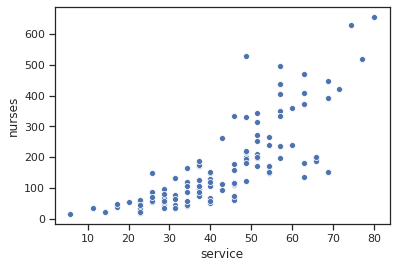

In [0]:
sns.scatterplot(x="service", y="nurses", data=df)

The nurses and the services have a positive correlation, however the relationship is not linear


---

Create a centered X variable and its quadratic term. Fit the second-order regression model
and report the estimated regression equation. Report both adjusted and unadjusted Rsquares.
Is the overall model fit significant?


In [0]:
df['center_X'] = df['service'] - df['service'].mean()
df['center_X_sq'] = df['center_X']**2

In [78]:
mod_last = smf.ols(formula='nurses ~ center_X_sq', data=df).fit()
mod_last.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 nurses   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     7.607
Date:                Tue, 28 Jan 2020   Prob (F-statistic):            0.00680
Time:                        13:42:08   Log-Likelihood:                -713.90
No. Observations:                 113   AIC:                             1432.
Df Residuals:                     111   BIC:                             1437.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     145.0210     16.335      8.878      0.000     112.653     177.389
center_X_sq     0.1232      0.045      2.758      0.007       0.035       0.212
==============================================================================
Omnibus:                       10.450   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.733
Skew:                           0.740   Prob(JB):                      0.00467
Kurtosis:                       3.303   Cond. No.                         469.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimated regression equation is
$$nurses = 145.0210 + 0.1232 * centered_X_sq$$
 R-squared is 0.064 and adjusted R-squared is 0.056. 

 The overall model fit is significant.

---
Show a plot of residuals against the predicted values and the normal probability plot of
residuals. What do you find? Are regression assumptions met? Conduct the White’s test
for homoscedasticity. Comment on your findings.


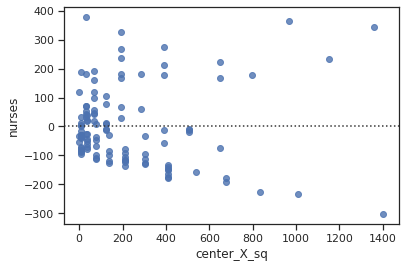

In [72]:
sns.residplot(x="center_X_sq", y="nurses", data=df)

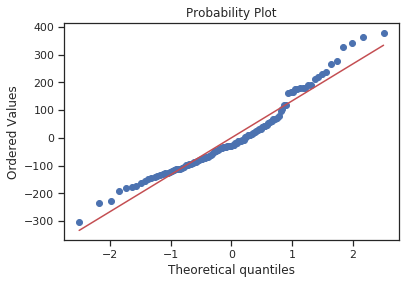

In [86]:
trash_tuple = stats.probplot(x=mod_last.resid, plot=sns.mpl.pyplot, fit=True)

In [89]:
from statsmodels.stats.diagnostic import het_white

white_test = het_white(mod_last.resid, exog=mod_last.model.exog)

labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']

print(dict(zip(labels, white_test)))

{'LM Statistic': 41.047963973942856, 'LM-Test p-value': 1.2205283636805404e-09, 'F-Statistic': 31.376985881945895, 'F-Test p-value': 1.652172657019338e-11}


We reject the null hypothesis. The residual plot, the probability plots, and the White test all show that the errors do not have equal variances. 

---

Fit the first-order regression model and report both adjusted and unadjusted R-squares.
Compare model fits with the second-order model. Has the addition of the quadratic term
in the regression model increased the adjusted R-square?

In [91]:
mod_first = smf.ols(formula='nurses ~ service', data=df).fit()
mod_first.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 nurses   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     176.5
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           1.11e-24
Time:                        13:48:03   Log-Likelihood:                -663.88
No. Observations:                 113   AIC:                             1332.
Df Residuals:                     111   BIC:                             1337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -136.5593     24.713     -5.526      0.000    -185.530     -87.588
service        7.1782      0.540     13.284      0.000       6.107       8.249
==============================================================================
Omnibus:                       13.657   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.579
Skew:                           0.685   Prob(JB):                     0.000251
Kurtosis:                       4.283   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared value is 0.614 and the adjusted R-squared value is 0.610. The first-order model is better than the second-order model. The addition of the quadratic term has decreased the adjusted R-squared.



In [101]:
model_f_test = smf.ols(formula='nurses ~ service + center_X_sq', data=df).fit()
model_f_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 nurses   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     105.3
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           2.79e-26
Time:                        13:58:50   Log-Likelihood:                -657.20
No. Observations:                 113   AIC:                             1320.
Df Residuals:                     110   BIC:                             1329.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -154.8918     23.915     -6.477      0.000    -202.285    -107.499
service         7.0662      0.513     13.787      0.000       6.050       8.082
center_X_sq     0.1012      0.027      3.716      0.000       0.047       0.155
==============================================================================
Omnibus:                       17.985   Durbin-Watson:                   1.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.675
Skew:                           0.564   Prob(JB):                     8.92e-10
Kurtosis:                       5.753   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
print(model_f_test.compare_f_test(restricted = mod_first))
print('F-value,', 'p-value,', 'Difference in df')

(13.806504803177596, 0.0003202726027488469, 1.0)
F-value, p-value, Difference in df


The null hypothesis is that the interaction term $\beta_{1,1}$ = $\beta_{2,2}$ = $\beta_{1,2}$ = 0 | the linear terms are in the model

Even though the F-value is still significant (p < 0.05) we can still drop the quadratic term based on the R-squared. The more appropriate analysis strategy is to transform the data.


---

Count data are often right-skewed and we make an a priori decision to log-transform
such data. Log-transform number of nurses (Y). Fit a first-order regression model using
the log-transformed Y and report the estimated regression model. Compare its adjusted Rsquare
with those obtained in parts b) and d) above. Show a plot of residuals against the
predicted values and the normal probability plot of residuals. Which model do you
prefer and why? Comment.


In [0]:
df['log_nurses'] = np.log(df['nurses'])

In [0]:
model_log = smf.ols(formula='log_nurses ~ service', data=df).fit()

In [110]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_nurses   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     288.2
Date:                Tue, 28 Jan 2020   Prob (F-statistic):           1.24e-32
Time:                        14:07:47   Log-Likelihood:                -66.929
No. Observations:                 113   AIC:                             137.9
Df Residuals:                     111   BIC:                             143.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8265      0.126     22.522      0.000       2.578       3.075
service        0.0466      0.003     16.978      0.000       0.041       0.052
==============================================================================
Omnibus:                        0.199   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.905   Jarque-Bera (JB):                0.363
Skew:                          -0.063   Prob(JB):                        0.834
Kurtosis:                       2.752   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

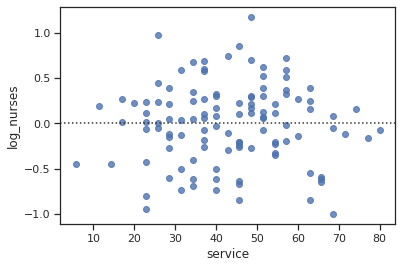

In [111]:
sns.residplot(x="service", y="log_nurses", data=df)

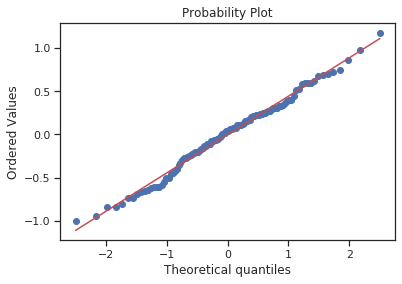

In [112]:
trash_tuple = stats.probplot(x=model_log.resid, plot=sns.mpl.pyplot, fit=True)

The estimated regression model is log.nurses = 2.8265 + 0.0466 * service. The adjusted R squared is increased compared to the other models. I prefer the log transformed model because it fits the spread of the data better, based on the original scatter plot.  